# 합성곱 신경망을 사용한 이미지 분류

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/8-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 패션 MNIST 데이터 불러오기

In [1]:
from tensorflow import keras
# keras import
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# 패션 mnist 데이터 로드

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
# 255로 나눠서 정규화 과정을 거침
# reshape(-1,28,28,1)을 통해서 전체 배열 차원을 유지하면서 마지막에 차원 추가

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)
# train_test_split()을 통해 훈련세트와 검증세트를 나눔

4422102/4422102 [==============================] - 0s 0us/step


## 합성곱 신경망 만들기

In [2]:
model = keras.Sequential()
# Sequential 클래스 객체 model 생성

In [3]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same',
                              input_shape=(28,28,1)))
# model에 합성곱 층인 Conv2D를 추가
# 매개변수로 커널 개수 32개, 커널 사이즈 3, 활성화 함수 relu, shame padidng, input_shape=(28,28,1)을 전달

In [4]:
model.add(keras.layers.MaxPooling2D(2)) # 풀링 층으로 MaxPooling을 사용

In [5]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
# 두 번째 합성곱 층 Conv2D를 추가
# 매개변수로 커널 개수 64개, 커널 사이즈 3, 활성화 함수 relu, shame padding을 전달
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Flatten()) # 1차원으로
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

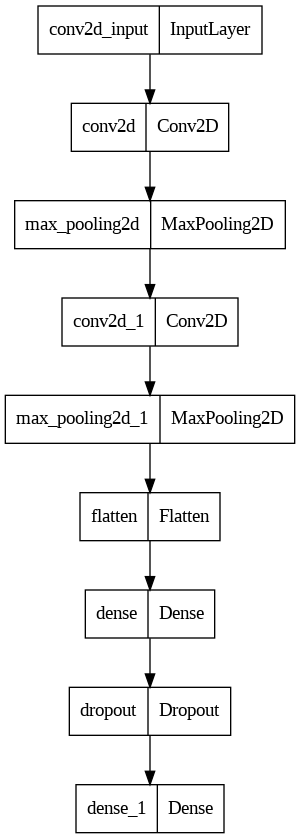

In [8]:
keras.utils.plot_model(model) # 층의 구성을 그림으로 표현

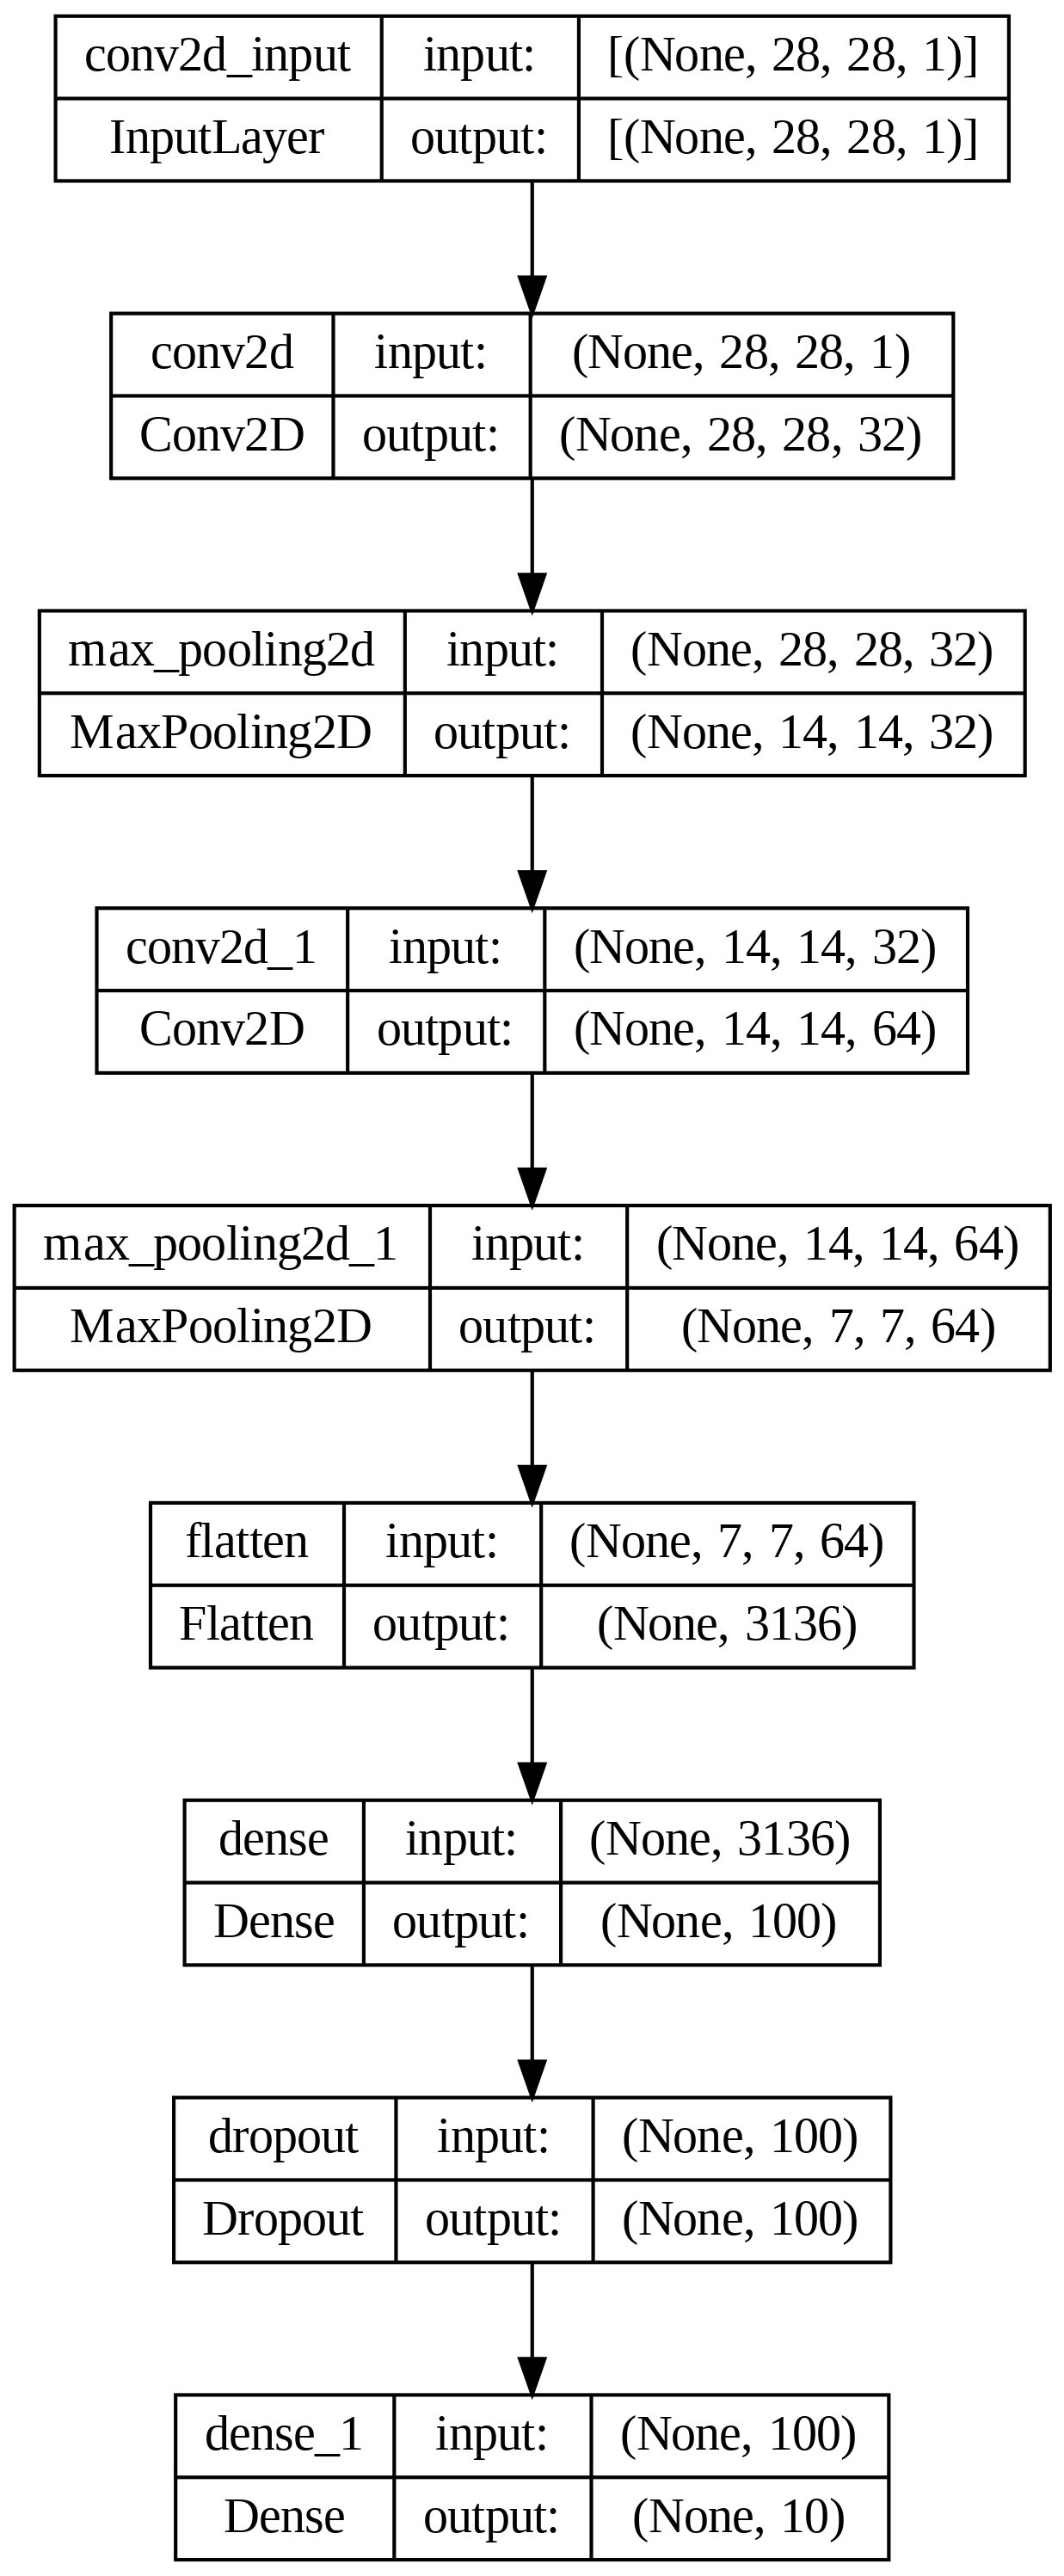

In [9]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)
# show_shapes=True를 통해 입력과 출력의 크기를 출력, to_file 매개변수에 파일 이름을 지정하여 출력한 이미지 저장 가능
# dpi를 통해 해상도 지정 가능

## 모델 컴파일과 훈련

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5') # ModelCheckpoint 콜백 사용
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)# Earlystopping 콜백 사용
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 22s 7ms/step - loss: 0.5486 - accuracy: 0.8015 - val_loss: 0.3382 - val_accuracy: 0.8723
Epoch 2/20
  22/1500 [..............................] - ETA: 7s - loss: 0.3964 - accuracy: 0.8594

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 10s 7ms/step - loss: 0.3656 - accuracy: 0.8673 - val_loss: 0.2878 - val_accuracy: 0.8953
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3135 - accuracy: 0.8867 - val_loss: 0.2767 - val_accuracy: 0.8978
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2776 - accuracy: 0.8993 - val_loss: 0.2622 - val_accuracy: 0.9023
Epoch 5/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2564 - accuracy: 0.9069 - val_loss: 0.2442 - val_accuracy: 0.9126
Epoch 6/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2371 - accuracy: 0.9140 - val_loss: 0.2275 - val_accuracy: 0.9148
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2188 - accuracy: 0.9195 - val_loss: 0.2217 - val_accuracy: 0.9192
Epoch 8/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2026 - accuracy: 0.9251 - val_loss: 0.2296 - val_accuracy: 0.9171
Ep

In [11]:
import matplotlib.pyplot as plt

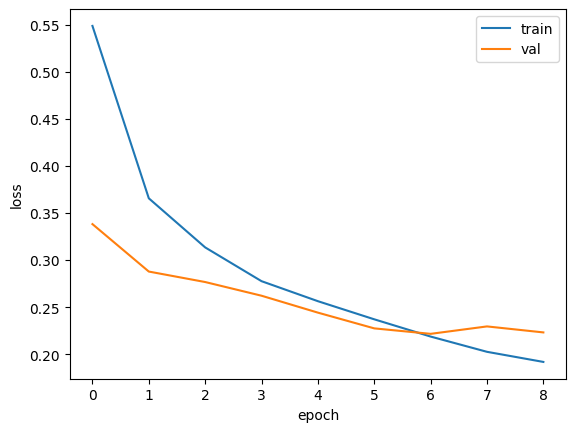

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 훈련세트와 검증세트의 손실 그래프 출력

In [13]:
model.evaluate(val_scaled, val_target) # 검증 세트 점수 출력

375/375 [==============================] - 1s 3ms/step - loss: 0.2217 - accuracy: 0.9192


[0.22169633209705353, 0.9191666841506958]

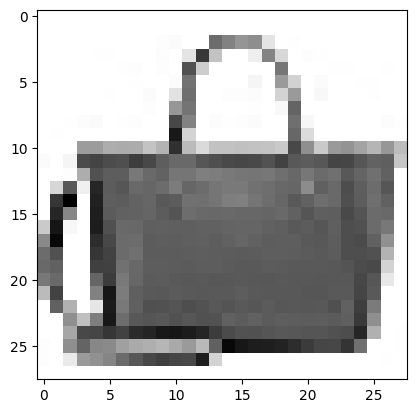

In [14]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show() # 첫 번째 샘플 이미지 출력

In [15]:
preds = model.predict(val_scaled[0:1])
print(preds)
# predict() 메서드를 통해 10개 클래스에 대한 예측 확률 출력

1/1 [==============================] - 0s 197ms/step
[[3.5936835e-13 6.1864585e-19 2.9193838e-16 3.2958801e-14 5.6762425e-16
  2.2666210e-16 8.6321961e-14 7.5905248e-16 1.0000000e+00 6.2864350e-15]]


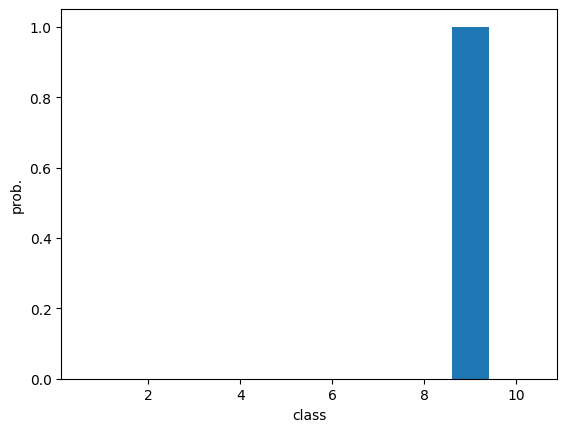

In [16]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()
# 막대 그래프로 확률 출력

In [17]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
           # 레이블을 리스트로 저장

In [18]:
import numpy as np
print(classes[np.argmax(preds)])
# preds에서 가장 높게 나온 값에 해당하는 인덱스를 classes 리스트에 적용해서 출력

가방


In [19]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
# 테스트 세트를 255로 나눠서 정규화 함

In [20]:
model.evaluate(test_scaled, test_target)
# evaluate()를 통해 테스트 세트 평가 점수 출력

313/313 [==============================] - 2s 5ms/step - loss: 0.2376 - accuracy: 0.9127


[0.23756416141986847, 0.9126999974250793]